Summary of Findings From Dataset
=============================

===========================================================================

FolkTables is a Python Library derived from the ACS (American Community Survey) Census Data and has multiple years worth of information on various demographics and divisions of the United States. 

The FolkTables code provides the abilility to download the dataset to csv and make custom prediction tasks on different variables

---------------------------------------------------------------------

ACSDataSource is used to download the dataset and can be supplied with year (ex. 2018) and horizon (1-year, 5-year)

The datasets are downloaded into a csv file with all features organized in the exact same order regardless of the dataset being downloaded, and each feature separated by a comma: 
ex. RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS


--------------------------------------------------------------------------
After obtaining all data for a particular year, can download for a particular state using *data-source.get_data* and argument: states = [two-letter state code]






According to *2018 ACS PUMS DATA DICTIONARY*
----------------------------------------------------------------------
(relevant for 2018 dataset)

Different states are categorized in the dataset using different numbers of length '2' and the feature is 'ST' in the csv file

For example: the same csv downloaded for the same region (01 - Northeast) will have rows corresponding to the state you chose in datasource.get_data (for example, Michigan)







Features, Labels, and Groups
========================


After downloading the data, you can either use df.to_numpy

ca_features1, ca_labels1, ca_group1 = ACSIncome.df_to_numpy(ca_data)
mi_features1, mi_labels1, mi_group1 = ACSIncome.df_to_numpy(mi_data)

OR

ca_features2, ca_labels2, ca_group2 = ACSIncome.df_to_pandas(ca_data, categories=ACSIncome_categories, dummies=True)
mi_features2, mi_labels2, mi_group2 = ACSIncome.df_to_pandas(ca_data, categories=ACSIncome_categories, dummies=True)



They key difference being that ACSIncome_categories is an object created with custom features corresponding to the prediction task you made, ex,  "SEX": {1.0: "Male", 2.0: "Female"},


ACSIncome_Categories is a custom prediction task which can be created but the creators of folktables created other prediction tasks such as : 

"
    Our IPUMS Adult reconstruction contains 49,531 rows, each with 14
    attributes.  The following table described the sizes of our datasets derived
    from ACS.
 
    |Task | Features | Datapoints |
    |-----|----------|------------|
    | ACSIncome         | 10       | 1,664,500  |
    | ACSPublicCoverage | 19       | 1,138,289  |
    | ACSMobility       | 21       | 620,937    |
    | ACSEmployment     | 17       | 3,236,107  |
    | ACSTravelTime     | 16       | 1,466,648  |
    
"

I used ACSIncome for ca_features1 and as expected:

the ca_features1.shape is (195665, 10) with the first number corresponding to number of rows, second corresponding to number of features.

Group is what you predict on (ex. RAC1P) and is only one column among all the rows in the dataset and its shape will be 1 * num rows


Features are the features chosen from the prediction task which are applied to the ML model: the number of
ca_features2.shape
(195665, 53)
53 means the custom prediction task ACSIncome_Categories has 53 features.



Labels is the outputs after applying the prediction tasks to the ML model (ex. ca_labels1) and its shape wil, like Group, be 1 * num rows

Group and Label will have the same shape, but features corresponds to a specific set of columns used in the prediction task


Histogram plots of different states' features, label, and group data in the notebook below (ex. AL, CA, MI) confirm the findings of what the shapes of the data are supposed to be above,

Notes:

Import folktables to download dataset (ACSDataSource)

call function ACSDataSource to customize year and other parameters for the survey being downloaded

data-source.get_data (download data for a particular state using argument: states = [two-letter state code]

after downloading data can use 


Group labels, 1 and 2


We first construct a data source for the 2018 yearly [American Community
Survey](https://www.census.gov/programs-surveys/acs), download the
corresponding data for Alabama, and use this data to instantiate a
prediction task of interest, for example, the `ACSEmployment` task.
```py

https://www.census.gov/programs-surveys/acs)
    Notes:
    

In [1]:
import folktables

from folktables import ACSDataSource, ACSEmployment

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["AL"], download=True)
features, label, group = ACSEmployment.df_to_numpy(acs_data)


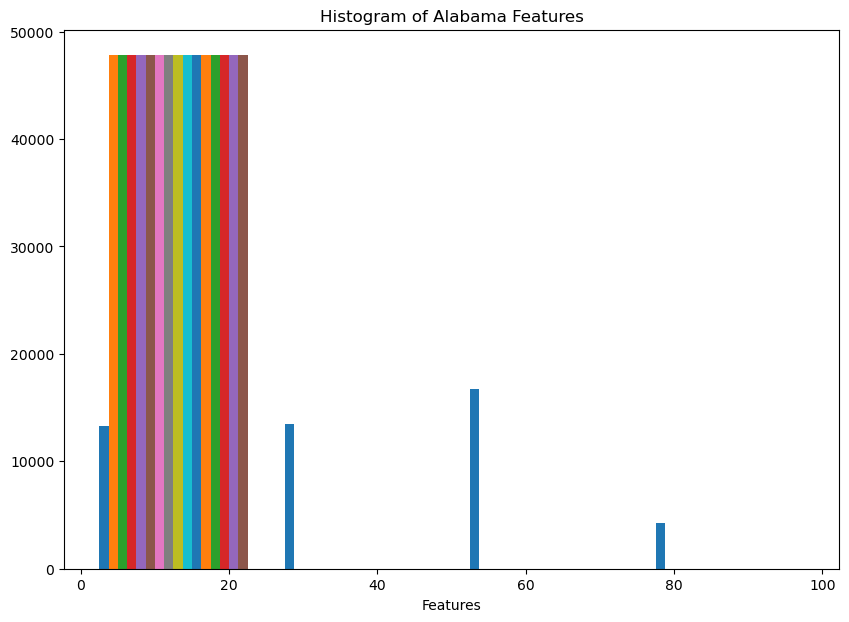

In [2]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of Alabama Features") 
  
# adding labels 
ax.set_xlabel('Features') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(features, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


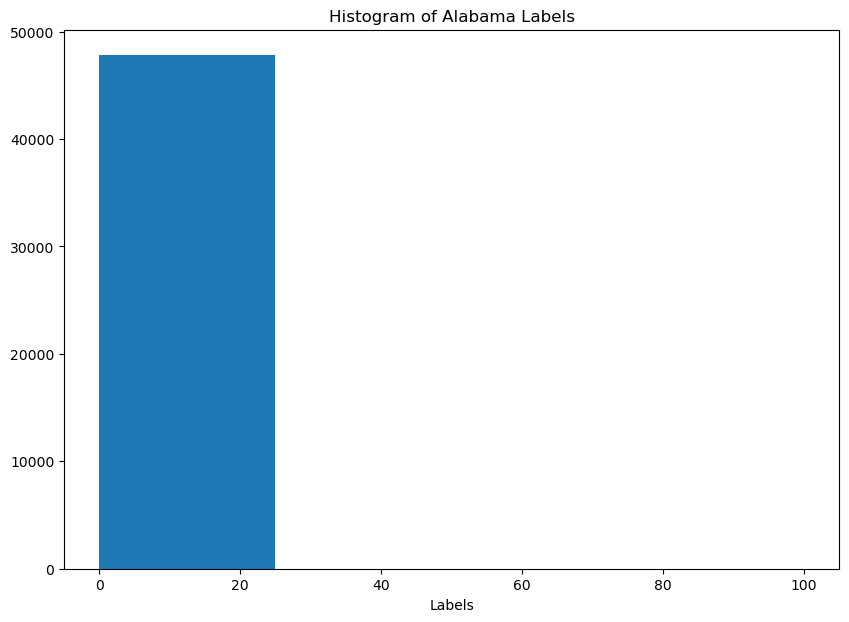

In [3]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of Alabama Labels") 
  
# adding labels 
ax.set_xlabel('Labels') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(label, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

In [4]:
features[1]

array([18., 18.,  5., 17.,  2.,  0.,  1.,  3.,  4.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.])

In [5]:
features[2]

array([53., 17.,  5., 16.,  1.,  0.,  1.,  1.,  4.,  2.,  1.,  2.,  2.,
        1.,  1.,  1.])

In [6]:
label

array([False, False, False, ..., False, False, False])

In [7]:
label[1]

False

In [8]:
label.shape

(47777,)

In [9]:
features.shape

(47777, 16)

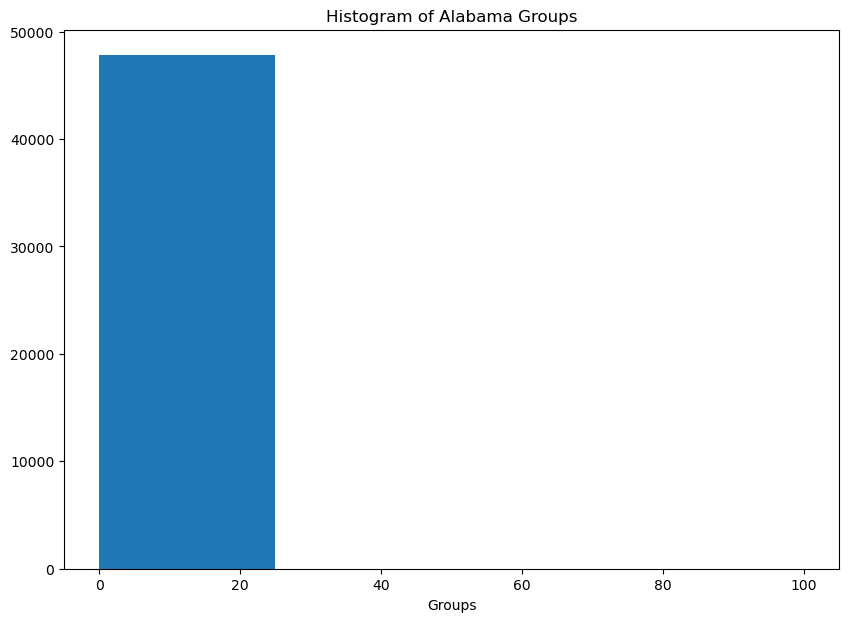

In [10]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of Alabama Groups") 
  
# adding labels 
ax.set_xlabel('Groups') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(group, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

In [11]:
group

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
group[0]

1

In [13]:
group[1000]

1

In [14]:
group.shape

(47777,)

In [15]:
label.shape

(47777,)

In [16]:
features.shape

(47777, 16)

Next we train a simple model on this dataset and use the `group` labels to
evaluate the model's violation of [equality of opportunity](https://fairmlbook.org/), a common fairness
metric.

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)

yhat = model.predict(X_test)

white_tpr = np.mean(yhat[(y_test == 1) & (group_test == 1)])
black_tpr = np.mean(yhat[(y_test == 1) & (group_test == 2)])

# Equality of opportunity violation: 0.0871
white_tpr - black_tpr

0.08711657913039306

The ACS data source contains data for all fifty states, each of which has a
slightly different distribution of features and response. This increases the
diversity of environments in which we can evaluate our methods. For instance, we
can generate another `ACSEmployment` task using data from Texas and repeat the
experiment

In [18]:
acs_tx = data_source.get_data(states=["TX"], download=True)
tx_features, tx_label, tx_group = ACSEmployment.df_to_numpy(acs_tx)

features, label, group = ACSEmployment.df_to_numpy(acs_tx)
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    tx_features, tx_label, tx_group, test_size=0.2, random_state=0)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)

yhat = model.predict(X_test)
white_tpr = np.mean(yhat[(y_test == 1) & (group_test == 1)])
black_tpr = np.mean(yhat[(y_test == 1) & (group_test == 2)])

# Equality of opportunity violation: 0.0397
white_tpr - black_tpr




0.03974373141377996

Distribution shift across states
Each prediction problem in Folktables can be instantiated on data from every US
state. This allows us to not just construct a diverse set of test environments,
but also to use Folktables to study questions aroud distribution shift. For
example, we can train a classifier using data from California and then evaluate
it on data from Michigan.

In [19]:
ACSIncome_categories = {
    "COW": {
        1.0: (
            "Employee of a private for-profit company or"
            "business, or of an individual, for wages,"
            "salary, or commissions"
        ),
        2.0: (
            "Employee of a private not-for-profit, tax-exempt,"
            "or charitable organization"
        ),
        3.0: "Local government employee (city, county, etc.)",
        4.0: "State government employee",
        5.0: "Federal government employee",
        6.0: (
            "Self-employed in own not incorporated business,"
            "professional practice, or farm"
        ),
        7.0: (
            "Self-employed in own incorporated business,"
            "professional practice or farm"
        ),
        8.0: "Working without pay in family business or farm",
        9.0: "Unemployed and last worked 5 years ago or earlier or never worked",
    },
    "SCHL": {
        1.0: "No schooling completed",
        2.0: "Nursery school, preschool",
        3.0: "Kindergarten",
        4.0: "Grade 1",
        5.0: "Grade 2",
        6.0: "Grade 3",
        7.0: "Grade 4",
        8.0: "Grade 5",
        9.0: "Grade 6",
        10.0: "Grade 7",
        11.0: "Grade 8",
        12.0: "Grade 9",
        13.0: "Grade 10",
        14.0: "Grade 11",
        15.0: "12th grade - no diploma",
        16.0: "Regular high school diploma",
        17.0: "GED or alternative credential",
        18.0: "Some college, but less than 1 year",
        19.0: "1 or more years of college credit, no degree",
        20.0: "Associate's degree",
        21.0: "Bachelor's degree",
        22.0: "Master's degree",
        23.0: "Professional degree beyond a bachelor's degree",
        24.0: "Doctorate degree",
    },
    "MAR": {
        1.0: "Married",
        2.0: "Widowed",
        3.0: "Divorced",
        4.0: "Separated",
        5.0: "Never married or under 15 years old",
    },
    "SEX": {1.0: "Male", 2.0: "Female"},
    "RAC1P": {
        1.0: "White alone",
        2.0: "Black or African American alone",
        3.0: "American Indian alone",
        4.0: "Alaska Native alone",
        5.0: (
            "American Indian and Alaska Native tribes specified;"
            "or American Indian or Alaska Native,"
            "not specified and no other"
        ),
        6.0: "Asian alone",
        7.0: "Native Hawaiian and Other Pacific Islander alone",
        8.0: "Some Other Race alone",
        9.0: "Two or More Races",
    },
}


In [20]:
from folktables import ACSDataSource, ACSIncome
from sklearn.linear_model import LogisticRegression

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
ca_data = data_source.get_data(states=["CA"], download=True)
mi_data = data_source.get_data(states=["MI"], download=True)
ca_features1, ca_labels1, ca_group1 = ACSIncome.df_to_numpy(ca_data)
mi_features1, mi_labels1, mi_group1 = ACSIncome.df_to_numpy(mi_data)

In [21]:

from folktables import ACSDataSource, ACSIncome
from sklearn.linear_model import LogisticRegression

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
ca_data = data_source.get_data(states=["CA"], download=True)
mi_data = data_source.get_data(states=["MI"], download=True)

ca_features2, ca_labels2, ca_group2 = ACSIncome.df_to_pandas(ca_data, categories=ACSIncome_categories, dummies=True)
mi_features2, mi_labels2, mi_group2 = ACSIncome.df_to_pandas(ca_data, categories=ACSIncome_categories, dummies=True)



In [22]:
ca_group1

array([8, 1, 1, ..., 1, 6, 8], dtype=int64)

In [23]:
mi_group1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
ca_group2

,RAC1P
0,8
1,1
2,1
3,1
4,1
...,...
195660,6
195661,6
195662,1
195663,6


In [25]:
ca_features2

,AGEP,OCCP,POBP,RELP,WKHP,"COW_Employee of a private for-profit company orbusiness, or of an individual, for wages,salary, or commissions","COW_Employee of a private not-for-profit, tax-exempt,or charitable organization",COW_Federal government employee,"COW_Local government employee (city, county, etc.)","COW_Self-employed in own incorporated business,professional practice or farm",...,SEX_Male,RAC1P_Alaska Native alone,RAC1P_American Indian alone,"RAC1P_American Indian and Alaska Native tribes specified;or American Indian or Alaska Native,not specified and no other",RAC1P_Asian alone,RAC1P_Black or African American alone,RAC1P_Native Hawaiian and Other Pacific Islander alone,RAC1P_Some Other Race alone,RAC1P_Two or More Races,RAC1P_White alone
0,30,9610.0,6,16,40.0,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,21,1970.0,6,17,20.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,65,2040.0,6,17,8.0,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,33,9610.0,36,16,40.0,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,18,1021.0,6,17,18.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195660,38,1021.0,210,0,40.0,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
195661,39,1021.0,210,1,40.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
195662,61,5240.0,17,0,45.0,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
195663,69,2040.0,207,0,45.0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False


In [26]:
ca_features2.shape

(195665, 53)

In [27]:
ca_features1

array([[30.,  6., 14., ..., 40.,  1.,  8.],
       [21.,  4., 16., ..., 20.,  1.,  1.],
       [65.,  2., 22., ...,  8.,  1.,  1.],
       ...,
       [61.,  1., 19., ..., 45.,  1.,  1.],
       [69.,  7., 24., ..., 45.,  1.,  6.],
       [40.,  1., 17., ..., 40.,  1.,  8.]])

In [28]:
ca_features1.shape

(195665, 10)

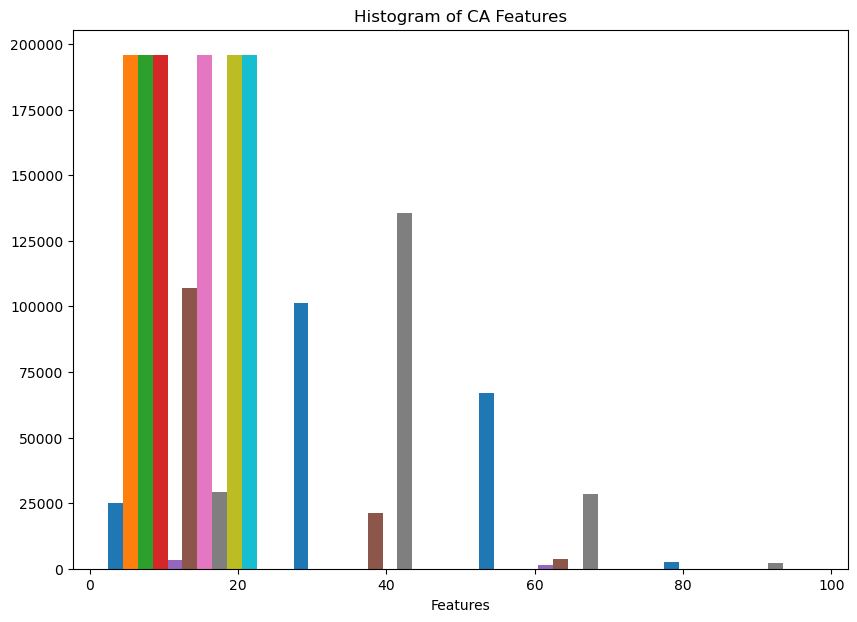

In [29]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of CA Features") 
  
# adding labels 
ax.set_xlabel('Features') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(ca_features1, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


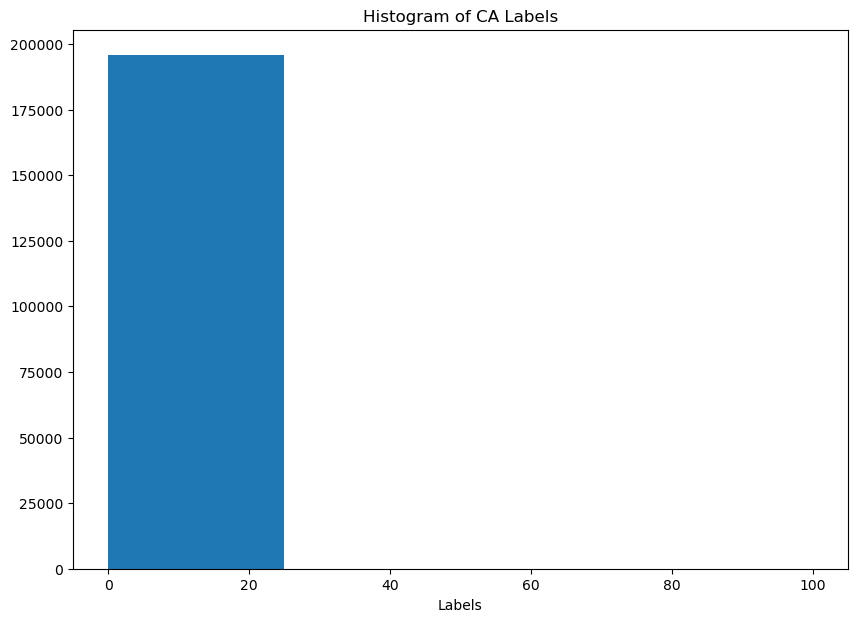

In [30]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of CA Labels") 
  
# adding labels 
# ax.set_xlabel('Features') 
ax.set_xlabel('Labels') 
# print(numbins)

ax.hist(ca_labels1, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

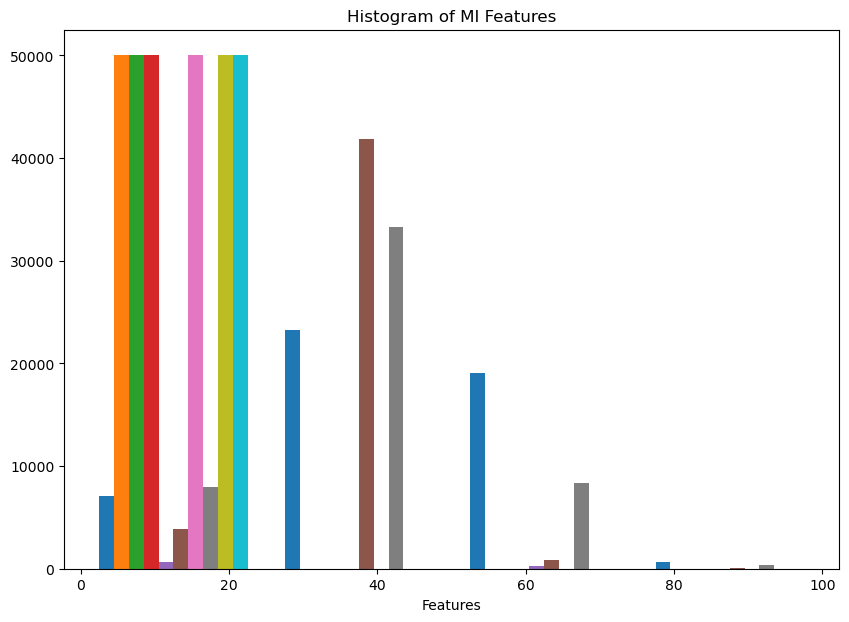

In [31]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of MI Features") 
  
# adding labels 
ax.set_xlabel('Features') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(mi_features1, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

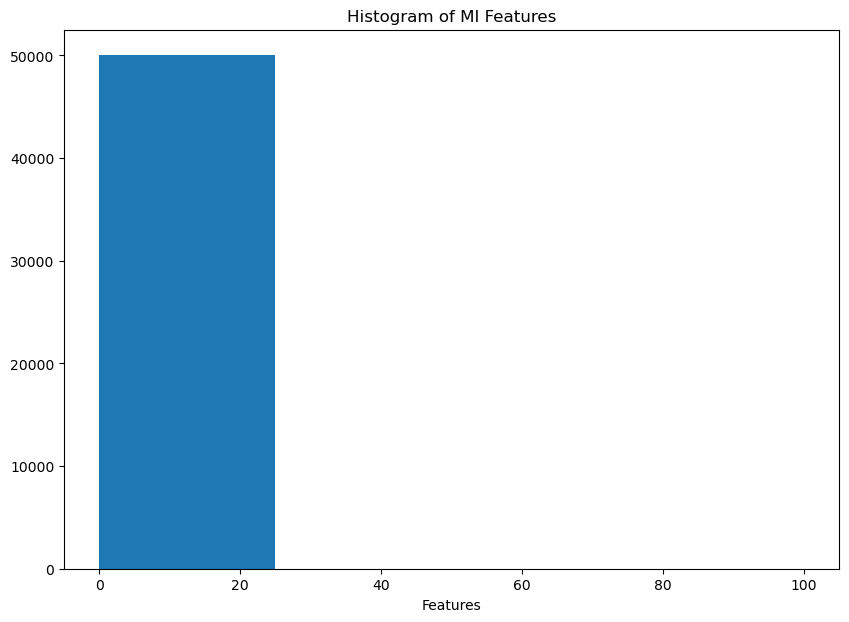

In [32]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of MI Features") 
  
# adding labels 
ax.set_xlabel('Features') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(mi_labels1, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

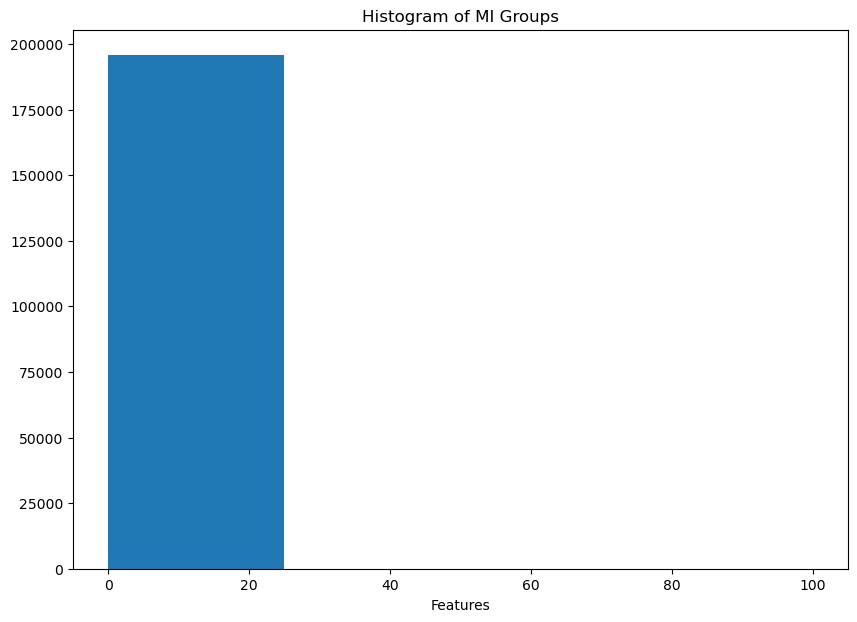

In [33]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of MI Groups") 
  
# adding labels 
ax.set_xlabel('Features') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(mi_group2, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

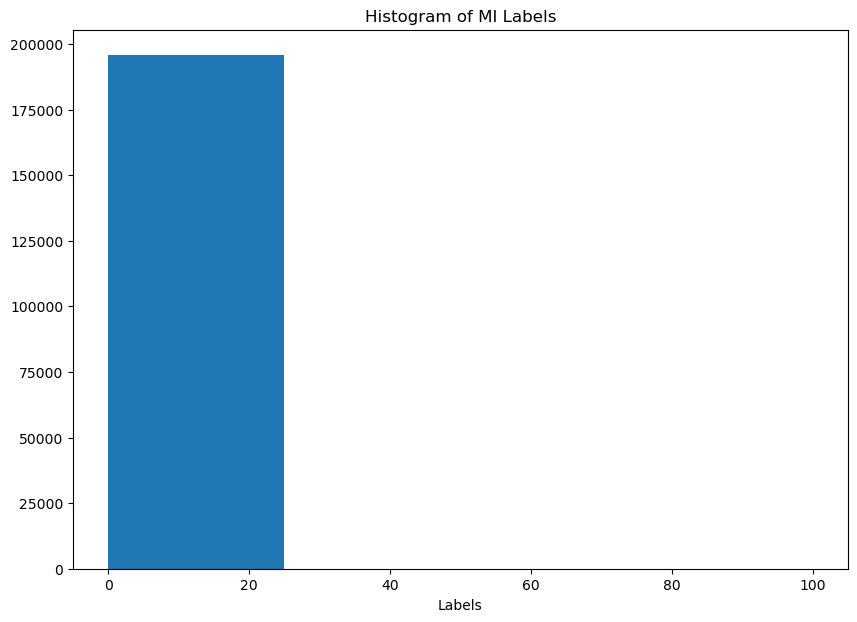

In [34]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of MI Labels") 
  
# adding labels 
ax.set_xlabel('Labels') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(mi_labels2, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

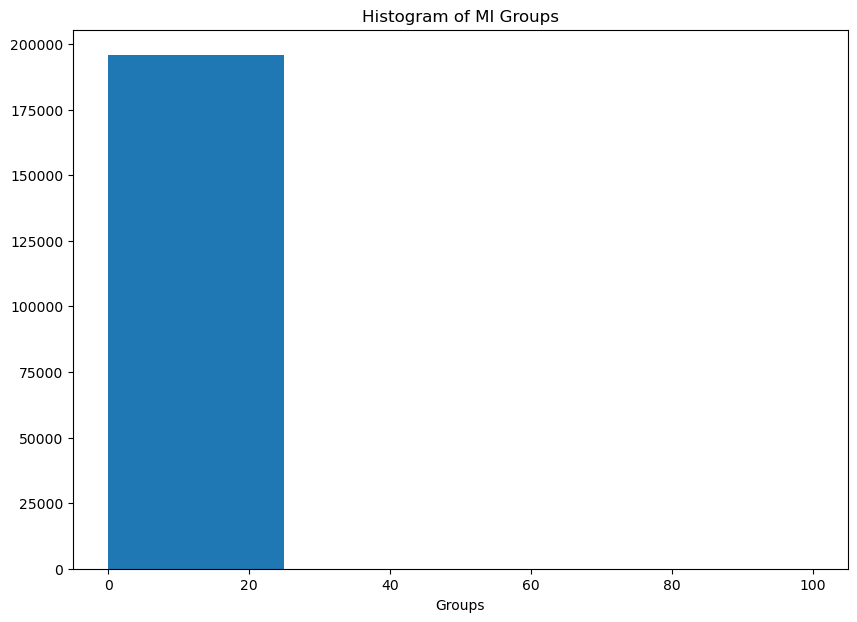

In [35]:
from matplotlib import pyplot as plt
import numpy as np
 
 

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
# x = int(np.sqrt(195665))
# print(x)
# numbins = np.round(x)
# Set title 
ax.set_title("Histogram of MI Groups") 
  
# adding labels 
ax.set_xlabel('Groups') 
# ax.set_ylabel('Labels') 
# print(numbins)

ax.hist(mi_group2, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()

In [36]:
mi_labels1

array([False, False, False, ...,  True,  True,  True])

In [37]:
mi_labels1.shape

(50008,)

In [38]:
mi_labels2

,PINCP
0,False
1,False
2,False
3,False
4,False
...,...
195660,True
195661,True
195662,True
195663,False


In [39]:
mi_features1

array([[20.,  2., 19., ...,  6.,  2.,  1.],
       [20.,  1., 18., ..., 40.,  1.,  1.],
       [81.,  2., 23., ..., 50.,  1.,  1.],
       ...,
       [40.,  1., 21., ..., 50.,  1.,  1.],
       [38.,  1., 21., ..., 40.,  2.,  1.],
       [47.,  6., 18., ..., 18.,  1.,  1.]])

In [40]:
mi_features1.shape

(50008, 10)

In [41]:
mi_features1[5000]

array([5.70e+01, 1.00e+00, 1.80e+01, 1.00e+00, 8.14e+03, 2.60e+01,
       9.00e+00, 4.00e+01, 2.00e+00, 1.00e+00])

In [42]:
mi_features1[5000][9]

1.0

In [43]:
from pandas import *
data = read_csv("data/2018/1-year/psam_p26.csv")
st = data['ST'].tolist()
sx = data['SEX'].tolist()
r1 = data['RAC1P'].tolist()
r3 = data['RAC3P'].tolist()
mp = data['MARHYP'].tolist()

 
# printing list data
print('State:', st)
print('Sex:', sx)
print('Race:', r1)
print('Detailed Race', r3)
print('Year Last Married', mp)



State: [26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 